In [1]:
!pip install mlxtend pandas

  Using cached scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.1 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl (7.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
import pandas as pd
import re

In [3]:
df = pd.read_csv('eCommerceRatings_wHeader.csv')

In [13]:
df.columns = [name.lower() for name in df.columns]


In [14]:
user_products = df.groupby('userid')['productid'].apply(list).reset_index()

In [15]:
user_products

,userid,productid
0,014789302X,"[A18M3W71X8TYY6, A1NLF2JD7BVOB4, A1X3F9FFDMZ92..."
1,097920500X,"[A13JV4DHJJ12YZ, A2O91YORQH16L5, A3R19YKNL641X3]"
2,140717455X,"[A1ZLRH1TEXOBRA, AELI4S2UHSI11, ANDPO7R2U9K64]"
3,1421694778,"[A1PN69BSDMSVS8, A2K8CM7Y4AZ557]"
4,1421697386,"[A1AG36LZCXMQ1U, AFXP3VWWC1DJ6]"
...,...,...
32581,B01HIWLLUK,[A22WJD50YSFYCC]
32582,B01HJ1K3YK,[A31CW6M6DOT894]
32583,B01HJ84SGM,"[A1IYJVHJSCR8DR, A1YQHF10YIMWOL, A2FZ7C9H14T5H..."
32584,B01HJASD20,[A15UPE8UMHA5KR]


<Axes: >

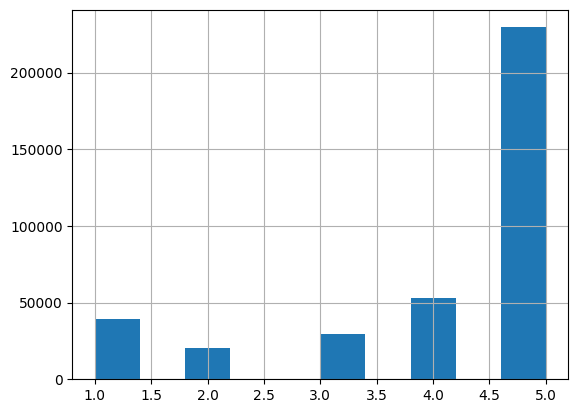

In [17]:
df.rating.hist()

In [29]:
df.shape

(371345, 4)

In [30]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df[['userid', 'productid']]
Y = df['rating']
i = 0
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    pd.concat([X_train, y_train], axis=1).to_csv(f"train_{i}.csv")
    pd.concat([X_test, y_test], axis=1).to_csv(f"test_{i}.csv")
    i += 1

In [ ]:
df = df[df['rating'] >= 4]  # only want ratings above a 4

# Group the products rated by each user into a list (a "transaction")

# Convert to a list of lists (transactions)
transactions = user_products['productId'].tolist()
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Convert the transactions into the format required by the Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_transactions, min_support=0.01, use_colnames=True)

# Generate the association rules with a minimum confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# View the association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])